In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import urllib

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [4]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

---

- Support Vector Machine

In [4]:
from sklearn import svm

def mymodel_SVM(X_train, y_train, X_test, y_test, C=1., kernel='rbf'):
    clf = svm.SVC(C=C, kernel=kernel)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    confusion_matrix(y_test, y_pred)
    
    print(classification_report(y_test, y_pred))

- Perceptron

#### Standardize Input

For neural networks to train properly, we need to standardize the input values. We standardize features by removing the mean and scaling to unit variance. The standard score of a sample `x` where the mean is `u` and the standard deviation is `s` is calculated as:

$z = (x — u) / s$

You can find more about standardization/normalization in neural nets [here](https://www.jeremyjordan.me/batch-normalization/).

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Parameters
To train our models, we need to set some hyper-parameters. Note that this is a very simple neural network, as a result, we do not tune a lot of hyper-parameters. The goal is to get to know how PyTorch works.

#### Define Custom Dataloaders

Let’s initialize our dataloaders. We’ll use a batch_size = 1 for our test dataloader.

In [13]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)

#### Define Neural Net Architecture

#### Train the model
Before we start the actual training, let’s define a function to calculate accuracy.

In the function below, we take the predicted and actual output as the input. The predicted value(a probability) is rounded off to convert it into either a 0 or a 1.

Once that is done, we simply compare the number of 1/0 we predicted to the number of 1/0 actually present and calculate the accuracy.

Note that the inputs y_pred and y_test are for a batch. Our batch_size was 64. So, this accuracy is being calculated for 64 predictions(tensors) at a time.

The moment we've been waiting for has arrived. Let's train our model.

You can see we've put a `model.train()` at the before the loop. `model.train()` tells PyTorch that you're in training mode.

Well, why do we need to do that? If you're using layers such as Dropout or BatchNorm which behave differently during training and evaluation, you need to tell PyTorch to act accordingly. While the default mode in PyTorch is the train, so, you don't explicitly have to write that. But it's good practice.

Similarly, we'll call `model.eval()` when we test our model. We'll see that below.

Back to training; we start a for-loop. At the top of this for-loop, we initialize our loss and accuracy per epoch to 0. After every epoch, we'll print out the loss/accuracy and reset it back to 0.

Then we have another for-loop. This for-loop is used to get our data in batches from the `train_loader`.

We do `optimizer.zero_grad()` before we make any predictions. Since the `backward()` function accumulates gradients, we need to set it to 0 manually per mini-batch.

From our defined model, we then obtain a prediction, get the loss(and accuracy) for that mini-batch, perform backpropagation using `loss.backward()` and `optimizer.step()`. Finally, we add all the mini-batch losses (and accuracies) to obtain the average loss (and accuracy) for that epoch.

This loss and accuracy is printed out in the outer `for` loop.

#### Test the model
After training is done, we need to test how our model fared. Note that we've used `model.eval()` before we run our testing code. To tell PyTorch that we do not want to perform back-propagation during inference, we use `torch.no_grad()` which reduces memory usage and speeds up computation.

We start by defining a list that will hold our predictions. Then we loop through our batches using the `test_loader`. For each batch —-

- We make the predictions using our trained model.
- Round off the probabilities to 1 or 0.
- Move the batch to the GPU from the CPU.
- Convert the tensor to a numpy object and append it to our list.
- Flatten out the list so that we can use it as an input to `confusion_matrix` and `classification_report`.

#### Confusion Matrix
Once we have all our predictions, we use the `confusion_matrix()` function from scikit-learn to calculate the confusion matrix.

#### Classification Report
To obtain the classification report which has precision, recall, and F1 score, we use the function `classification_report`.

# Dataset #1

In [5]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset1'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(700, 200)
(700,)
(350, 200)
(350,)


<AxesSubplot:>

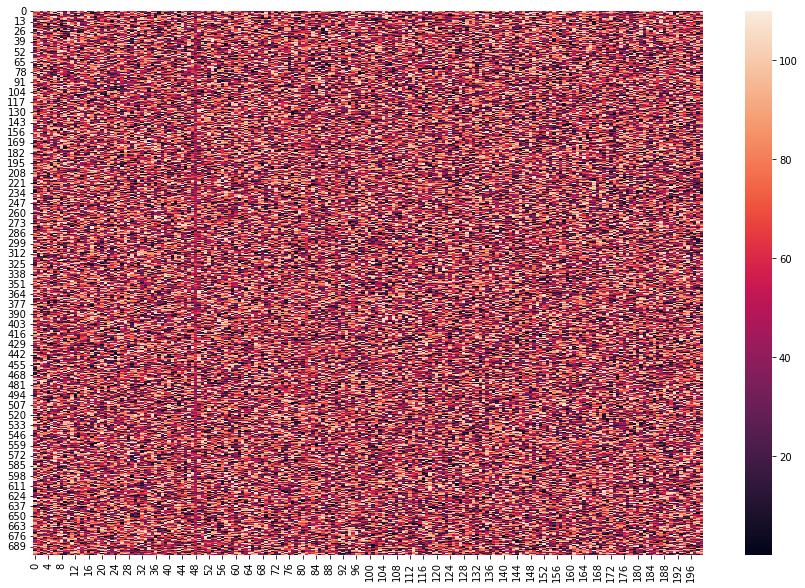

In [6]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

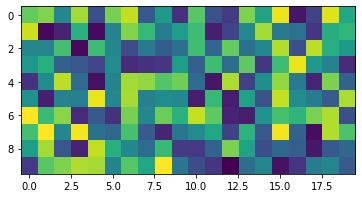

In [7]:
plt.imshow(X_train[np.random.randint(X_train.shape[-1], size=1)[0],:].reshape([10,20]))

In [9]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15       100
         1.0       0.73      1.00      0.84       250

    accuracy                           0.74       350
   macro avg       0.87      0.54      0.50       350
weighted avg       0.81      0.74      0.65       350



# Dataset #2

In [12]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset2'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(200, 80)
(200,)
(400, 80)
(400,)


<AxesSubplot:>

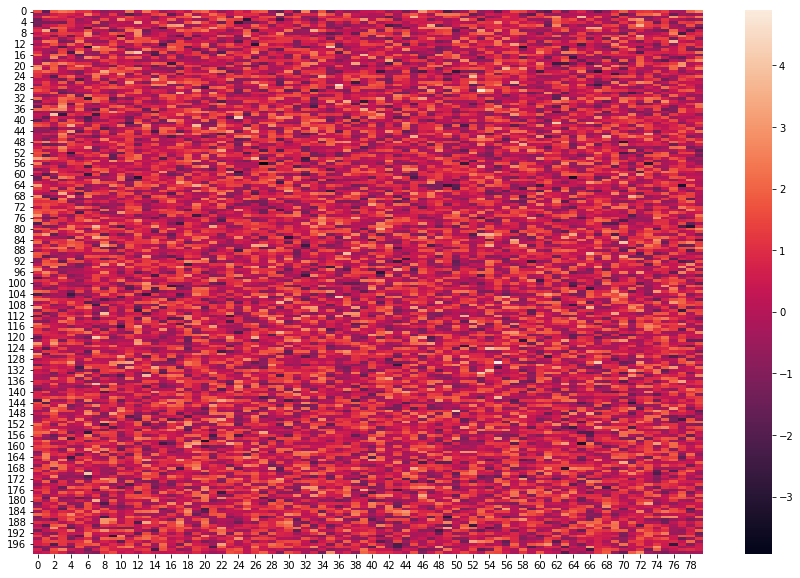

In [13]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

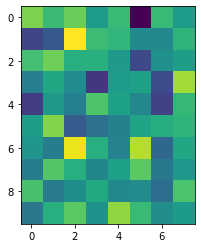

In [14]:
plt.imshow(X_train[np.random.randint(X_train.shape[-1], size=1)[0],:].reshape([10,8]))

In [15]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73       200
         1.0       0.73      0.70      0.72       200

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



# Dataset #3

In [75]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset3'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


<AxesSubplot:>

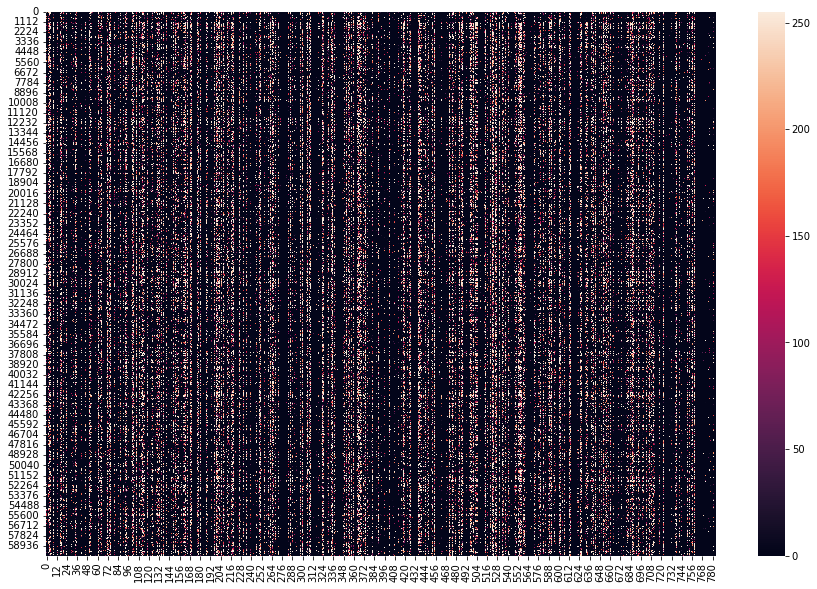

In [5]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

9


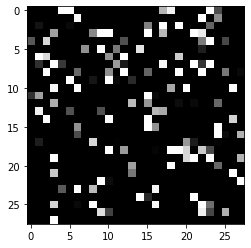

In [5]:
idx=6
plt.imshow(X_train[idx].reshape((28, 28), order='C'), cmap='gray')
print(y_train[idx])

In [20]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5952
           1       0.99      0.99      0.99      6791
           2       0.97      0.98      0.98      6026
           3       0.98      0.97      0.97      6084
           4       0.98      0.98      0.98      5780
           5       0.97      0.98      0.97      5454
           6       0.99      0.98      0.98      5957
           7       0.98      0.97      0.98      6231
           8       0.97      0.97      0.97      5890
           9       0.97      0.96      0.97      5835

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [12]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

#### Normalizing the Image Data
Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [7]:
# scaler = StandardScaler()
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train = torch.FloatTensor(X_train)
y_train = torch.IntTensor(y_train)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [9]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)

    def forward(self, x):
        return self.linear(x)

model = Model()
model.to(device)

Model(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [11]:
loss_function = F.cross_entropy
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [13]:
for epoch in range(EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for x_batch, y_batch_true in train_loader:
        
        x_batch, y_batch_true = x_batch.to(device), y_batch_true.to(device, dtype=torch.int64)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward
        y_batch_log_pred = model(x_batch)
        loss = loss_function(y_batch_log_pred, y_batch_true)
        y_batch_pred = torch.argmax(y_batch_log_pred, dim=-1)
        acc = (y_batch_pred == y_batch_true).to(torch.float).mean()

        # Backword
        loss.backward()

        # Update
        optimizer.step()
        
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

#     with torch.no_grad():
#         y_test_log_pred = model(X_test)
#     print(f"End of epoch {epoch + 1}")
#     print_loss_accuracy(y_test_log_pred, y_test, loss_function)
#     print("---")

Epoch 000: | Loss: 1.90913 | Acc: 0.572
Epoch 001: | Loss: 1.39280 | Acc: 0.767
Epoch 002: | Loss: 1.12412 | Acc: 0.802
Epoch 003: | Loss: 0.96713 | Acc: 0.819
Epoch 004: | Loss: 0.86526 | Acc: 0.829
Epoch 005: | Loss: 0.79345 | Acc: 0.837
Epoch 006: | Loss: 0.74017 | Acc: 0.843
Epoch 007: | Loss: 0.69884 | Acc: 0.849
Epoch 008: | Loss: 0.66583 | Acc: 0.852
Epoch 009: | Loss: 0.63871 | Acc: 0.856
Epoch 010: | Loss: 0.61584 | Acc: 0.858
Epoch 011: | Loss: 0.59634 | Acc: 0.861
Epoch 012: | Loss: 0.57955 | Acc: 0.863
Epoch 013: | Loss: 0.56483 | Acc: 0.865
Epoch 014: | Loss: 0.55189 | Acc: 0.867
Epoch 015: | Loss: 0.54034 | Acc: 0.868
Epoch 016: | Loss: 0.52975 | Acc: 0.870
Epoch 017: | Loss: 0.52037 | Acc: 0.871
Epoch 018: | Loss: 0.51182 | Acc: 0.872
Epoch 019: | Loss: 0.50406 | Acc: 0.874
Epoch 020: | Loss: 0.49667 | Acc: 0.874
Epoch 021: | Loss: 0.49015 | Acc: 0.876
Epoch 022: | Loss: 0.48387 | Acc: 0.877
Epoch 023: | Loss: 0.47823 | Acc: 0.878
Epoch 024: | Loss: 0.47271 | Acc: 0.879


In [77]:
X_test = torch.FloatTensor(X_test)
test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [82]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for [X_batch] in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        tag = torch.argmax(y_test_pred, dim=-1)
        y_pred_list.append(tag.cpu().numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])

In [83]:
confusion_matrix(y_test, y_pred_list)

array([[5711,    1,   35,   24,   11,   41,   68,   12,   40,    9],
       [   1, 6584,   40,   19,    2,   25,   14,    3,   99,    4],
       [  47,   67, 5153,   92,  117,   19,  120,  125,  233,   53],
       [  39,   23,  178, 5255,    2,  227,   32,   77,  160,   91],
       [  14,   27,   25,    4, 5255,    6,   79,   20,   34,  316],
       [  93,   77,   37,  260,  116, 4413,  110,   53,  216,   79],
       [  88,   37,   65,    9,   72,  120, 5509,    2,   53,    2],
       [  35,   89,  135,   21,  102,    3,    0, 5589,   26,  231],
       [  49,  146,   80,  197,   61,  186,   50,   56, 4926,  139],
       [  56,   35,   54,   84,  271,   46,    3,  149,   58, 5079]])

In [84]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5952
           1       0.93      0.97      0.95      6791
           2       0.89      0.86      0.87      6026
           3       0.88      0.86      0.87      6084
           4       0.87      0.91      0.89      5780
           5       0.87      0.81      0.84      5454
           6       0.92      0.92      0.92      5957
           7       0.92      0.90      0.91      6231
           8       0.84      0.84      0.84      5890
           9       0.85      0.87      0.86      5835

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



# Dataset #4

In [21]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset4'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(200, 100)
(200,)
(200, 100)
(200,)


<AxesSubplot:>

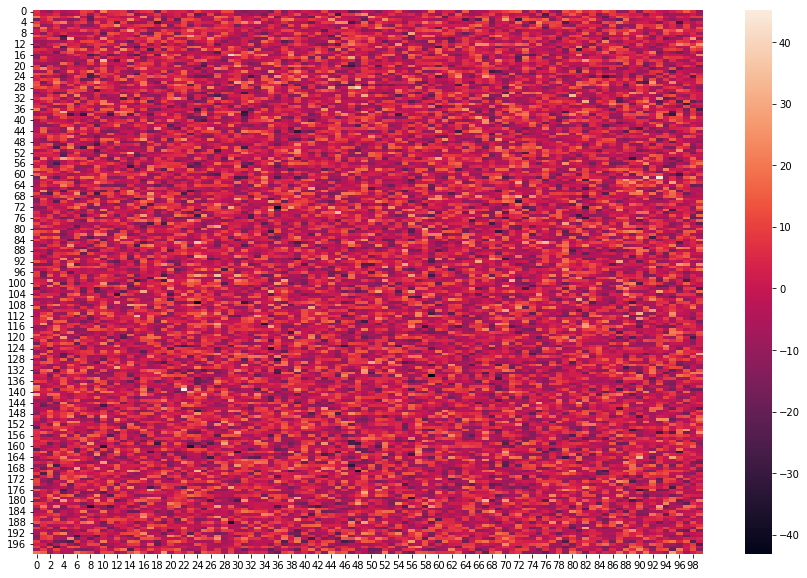

In [22]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

In [23]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       100
         1.0       0.78      0.80      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# Dataset #5

In [5]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset5'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(391500, 300)
(391500,)
(167650, 300)
(167650,)


<AxesSubplot:>

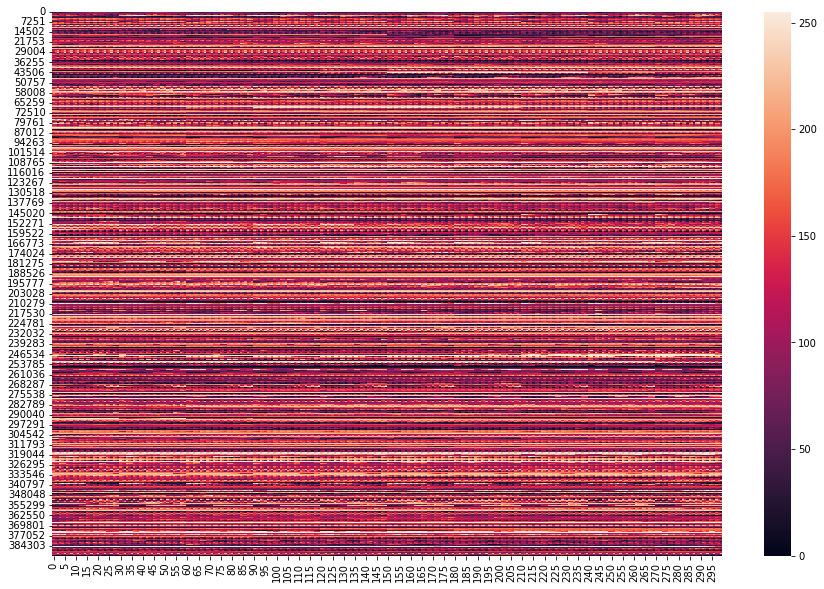

In [25]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

2


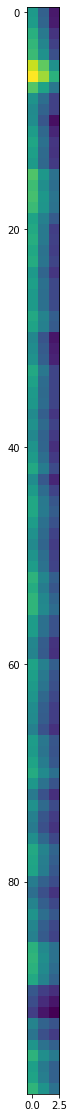

In [50]:
fig = plt.figure(figsize=(6,20))

idx=400
plt.imshow(X_train[idx].reshape((100, 3)))
print(y_train[idx])

In [51]:
EPOCHS = 30
BATCH_SIZE = 64
LEARNING_RATE = 0.001

#### Normalizing the Image Data
Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [52]:
# scaler = StandardScaler()
X_train = X_train / 255
X_test = X_test / 255

In [53]:
X_train = torch.FloatTensor(X_train)
y_train = torch.IntTensor(y_train-1)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [54]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(300, 5)

    def forward(self, x):
        return self.linear(x)

model = Model()
model.to(device)

Model(
  (linear): Linear(in_features=300, out_features=5, bias=True)
)

In [55]:
loss_function = F.cross_entropy
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [56]:
for epoch in range(EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for x_batch, y_batch_true in train_loader:
        
        x_batch, y_batch_true = x_batch.to(device), y_batch_true.to(device, dtype=torch.int64)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward
        y_batch_log_pred = model(x_batch)
        loss = loss_function(y_batch_log_pred, y_batch_true)
        y_batch_pred = torch.argmax(y_batch_log_pred, dim=-1)
        acc = (y_batch_pred == y_batch_true).to(torch.float).mean()

        # Backword
        loss.backward()

        # Update
        optimizer.step()
        
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

#     with torch.no_grad():
#         y_test_log_pred = model(X_test)
#     print(f"End of epoch {epoch + 1}")
#     print_loss_accuracy(y_test_log_pred, y_test, loss_function)
#     print("---")

Epoch 000: | Loss: 1.52841 | Acc: 0.385
Epoch 001: | Loss: 1.47647 | Acc: 0.445
Epoch 002: | Loss: 1.45164 | Acc: 0.455
Epoch 003: | Loss: 1.43570 | Acc: 0.457
Epoch 004: | Loss: 1.42459 | Acc: 0.457
Epoch 005: | Loss: 1.41653 | Acc: 0.456
Epoch 006: | Loss: 1.41061 | Acc: 0.454
Epoch 007: | Loss: 1.40600 | Acc: 0.453
Epoch 008: | Loss: 1.40250 | Acc: 0.452
Epoch 009: | Loss: 1.39974 | Acc: 0.451
Epoch 010: | Loss: 1.39756 | Acc: 0.450
Epoch 011: | Loss: 1.39589 | Acc: 0.449
Epoch 012: | Loss: 1.39436 | Acc: 0.449
Epoch 013: | Loss: 1.39324 | Acc: 0.448
Epoch 014: | Loss: 1.39231 | Acc: 0.448
Epoch 015: | Loss: 1.39148 | Acc: 0.447
Epoch 016: | Loss: 1.39081 | Acc: 0.447
Epoch 017: | Loss: 1.39029 | Acc: 0.446
Epoch 018: | Loss: 1.38984 | Acc: 0.446
Epoch 019: | Loss: 1.38943 | Acc: 0.446
Epoch 020: | Loss: 1.38907 | Acc: 0.446
Epoch 021: | Loss: 1.38885 | Acc: 0.445
Epoch 022: | Loss: 1.38855 | Acc: 0.446
Epoch 023: | Loss: 1.38836 | Acc: 0.445
Epoch 024: | Loss: 1.38818 | Acc: 0.445


In [57]:
X_test = torch.FloatTensor(X_test)
test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [58]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for [X_batch] in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        tag = torch.argmax(y_test_pred, dim=-1)
        y_pred_list.append(tag.cpu().numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])

In [59]:
confusion_matrix(y_test, y_pred_list)

array([[    0,     0,     0,     0,     0,     0],
       [ 6811,  1424,  3751,  7258,  6656,     0],
       [   70, 10812, 10897,  1994,  9927,     0],
       [  229,  4890, 21822,  2238,  4821,     0],
       [ 5010,  4084,  7203,  8291, 10662,     0],
       [  354,  2994,  6251,  2111, 27090,     0]])

In [60]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.06      0.05      0.06     25900
           2       0.22      0.32      0.26     33700
           3       0.10      0.07      0.08     34000
           4       0.18      0.30      0.23     35250
           5       0.00      0.00      0.00     38800

    accuracy                           0.15    167650
   macro avg       0.09      0.12      0.10    167650
weighted avg       0.11      0.15      0.12    167650



/home/sungbeenpark/anaconda3/envs/algonauts/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungbeenpark/anaconda3/envs/algonauts/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungbeenpark/anaconda3/envs/algonauts/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 